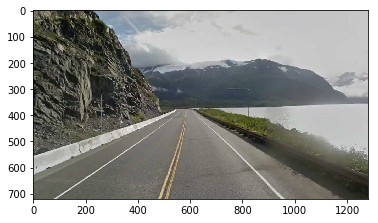

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('highway.jpg')

plt.imshow(image)

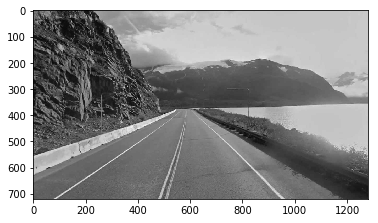

In [24]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

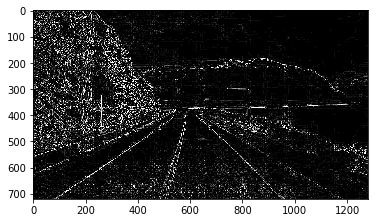

In [25]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

## TODO: Create and apply a Sobel x operator
sobel = np.array([[ 0, -8, 0], 
                   [ -8, 32, -8], 
                   [ 0, -8, 0]])

sobel_5x = np.array([[0,0,-2,0,0],
                     [0,-2,-4,-2,0],
                     [-2,-4,32,-4,0],
                     [0,-2,-4,-2,0],
                     [0,0,-2,0,0]])
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel)

plt.imshow(filtered_image, cmap='gray')

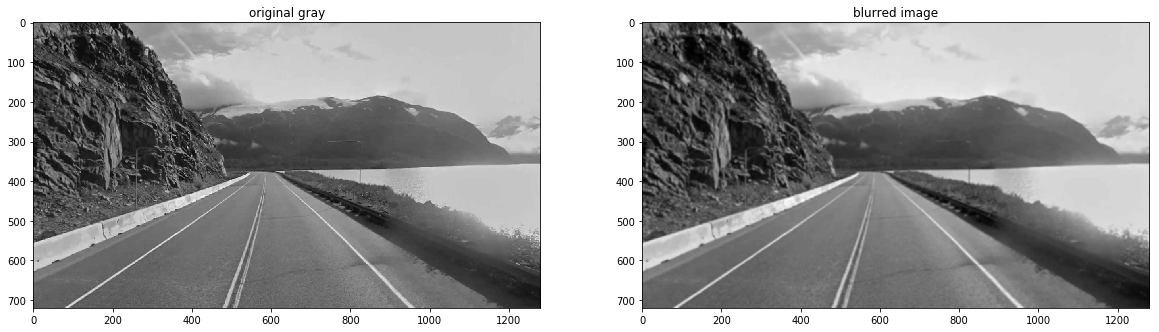

In [26]:
# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

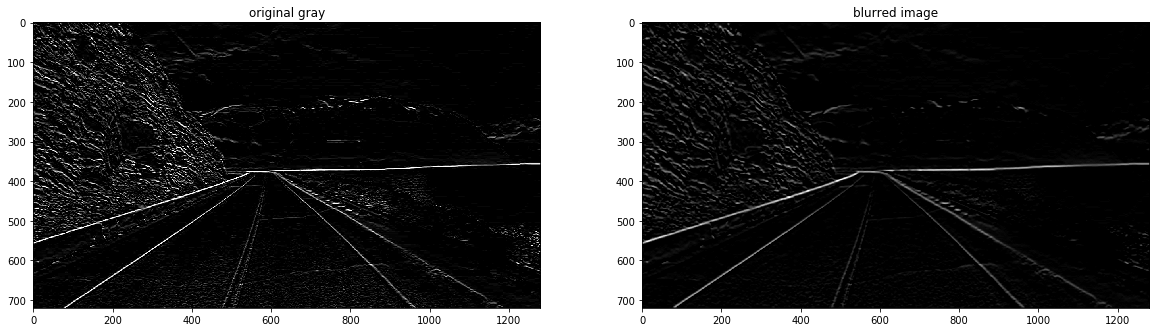

In [13]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_y)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

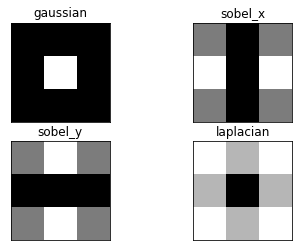

In [14]:
# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
# Fourier transform

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm = gray/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

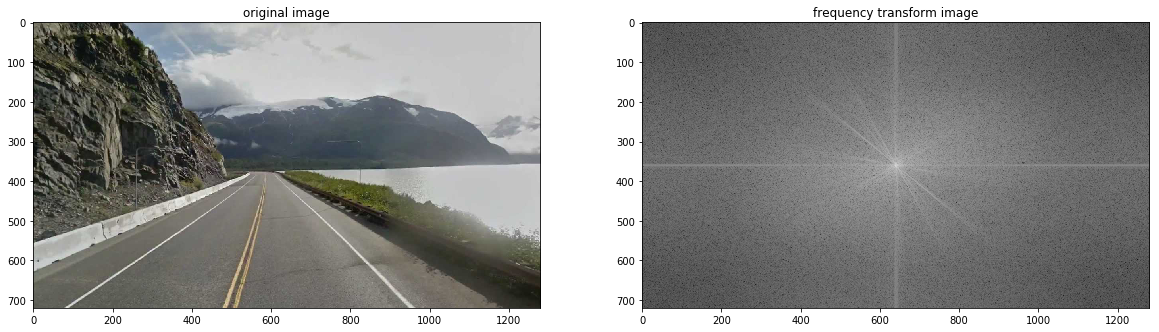

In [17]:
# Call the function on the normalized images
# and display the transforms
f_t = ft_image(norm)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image)
ax2.set_title('frequency transform image')
ax2.imshow(f_t, cmap='gray')


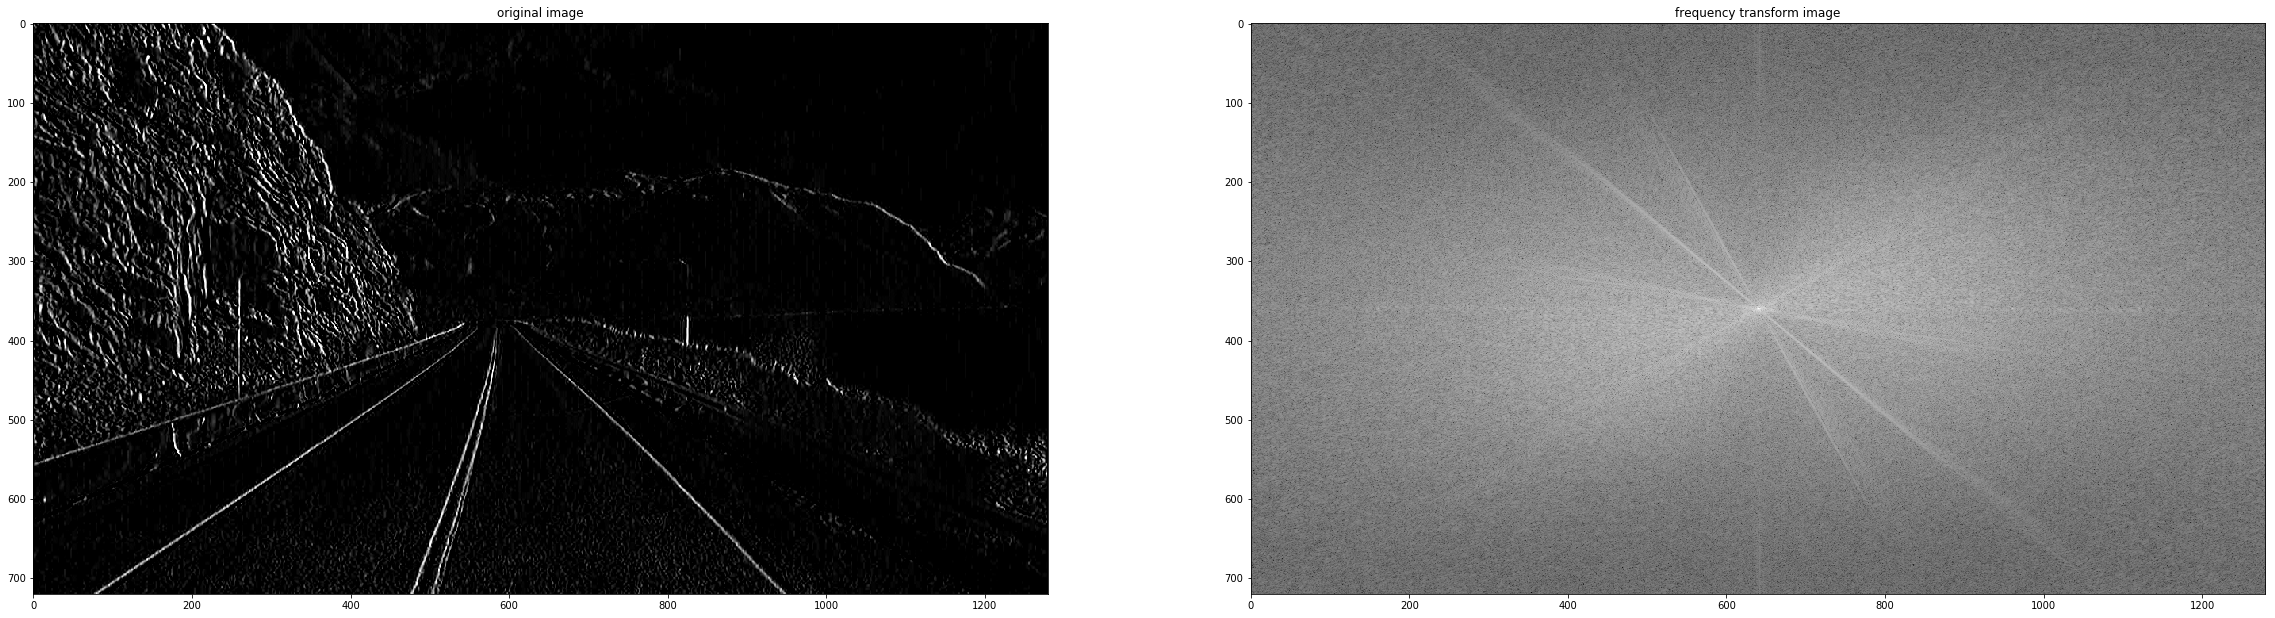

In [38]:
after_filter = cv2.filter2D(gray, -1, sobel_x)
after_norm = after_filter/255.0
after_ft = ft_image(after_norm)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(40,20))

ax1.set_title('original image')
ax1.imshow(after_filter, cmap='gray')
ax2.set_title('frequency transform image')
ax2.imshow(after_ft, cmap='gray')

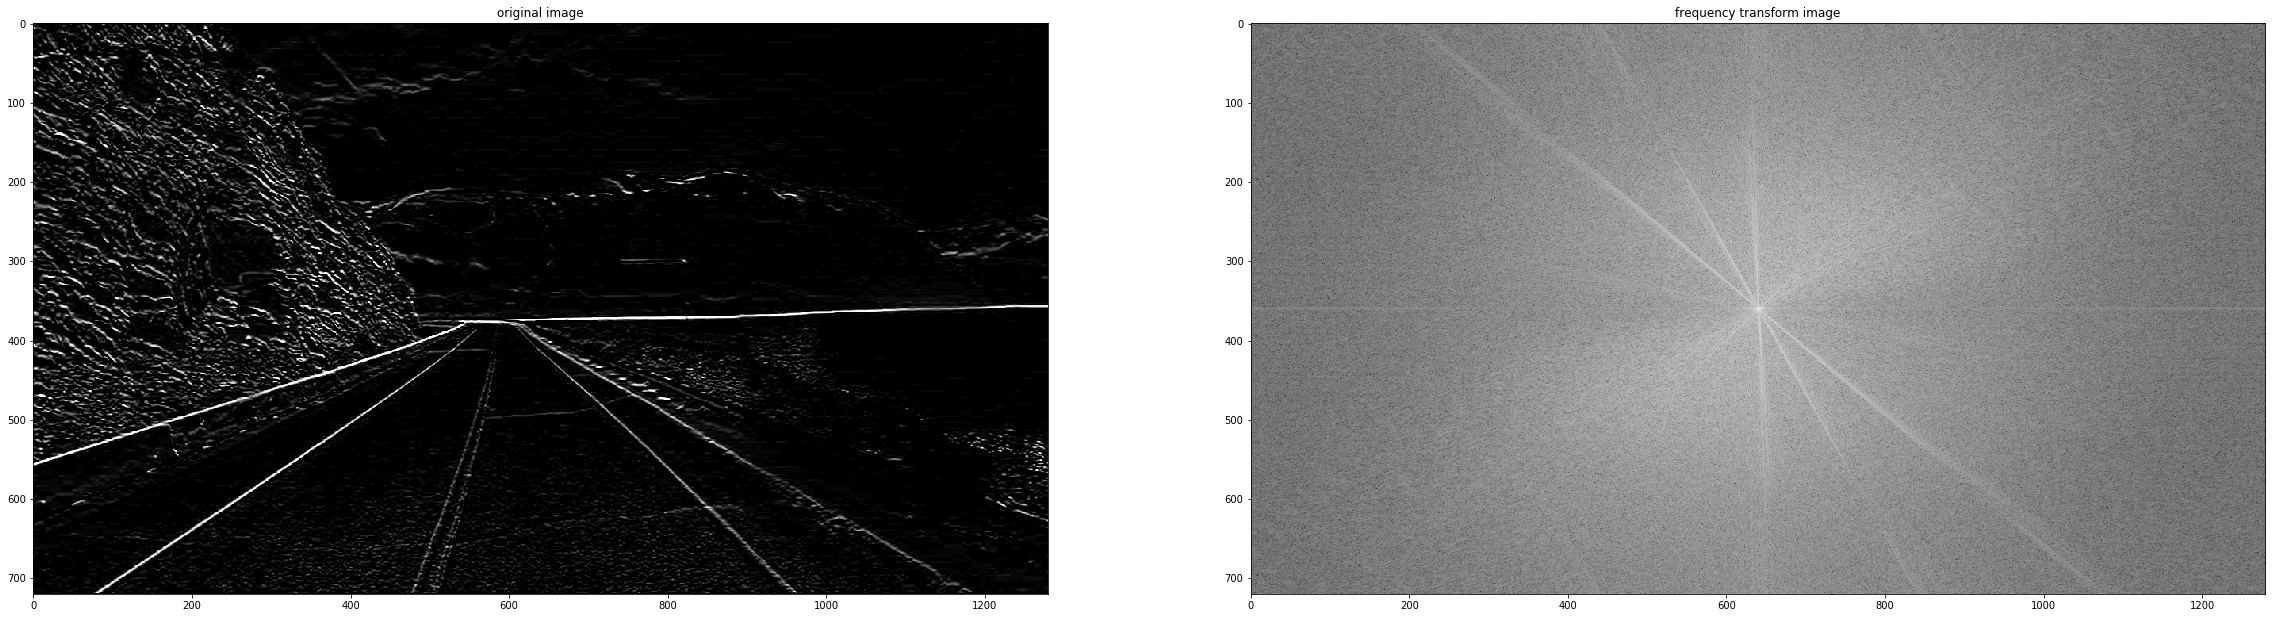

In [39]:
after_filter = cv2.filter2D(gray, -1, sobel_y)
after_norm = after_filter/255.0
after_ft = ft_image(after_norm)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(40,20))

ax1.set_title('original image')
ax1.imshow(after_filter, cmap='gray')
ax2.set_title('frequency transform image')
ax2.imshow(after_ft, cmap='gray')

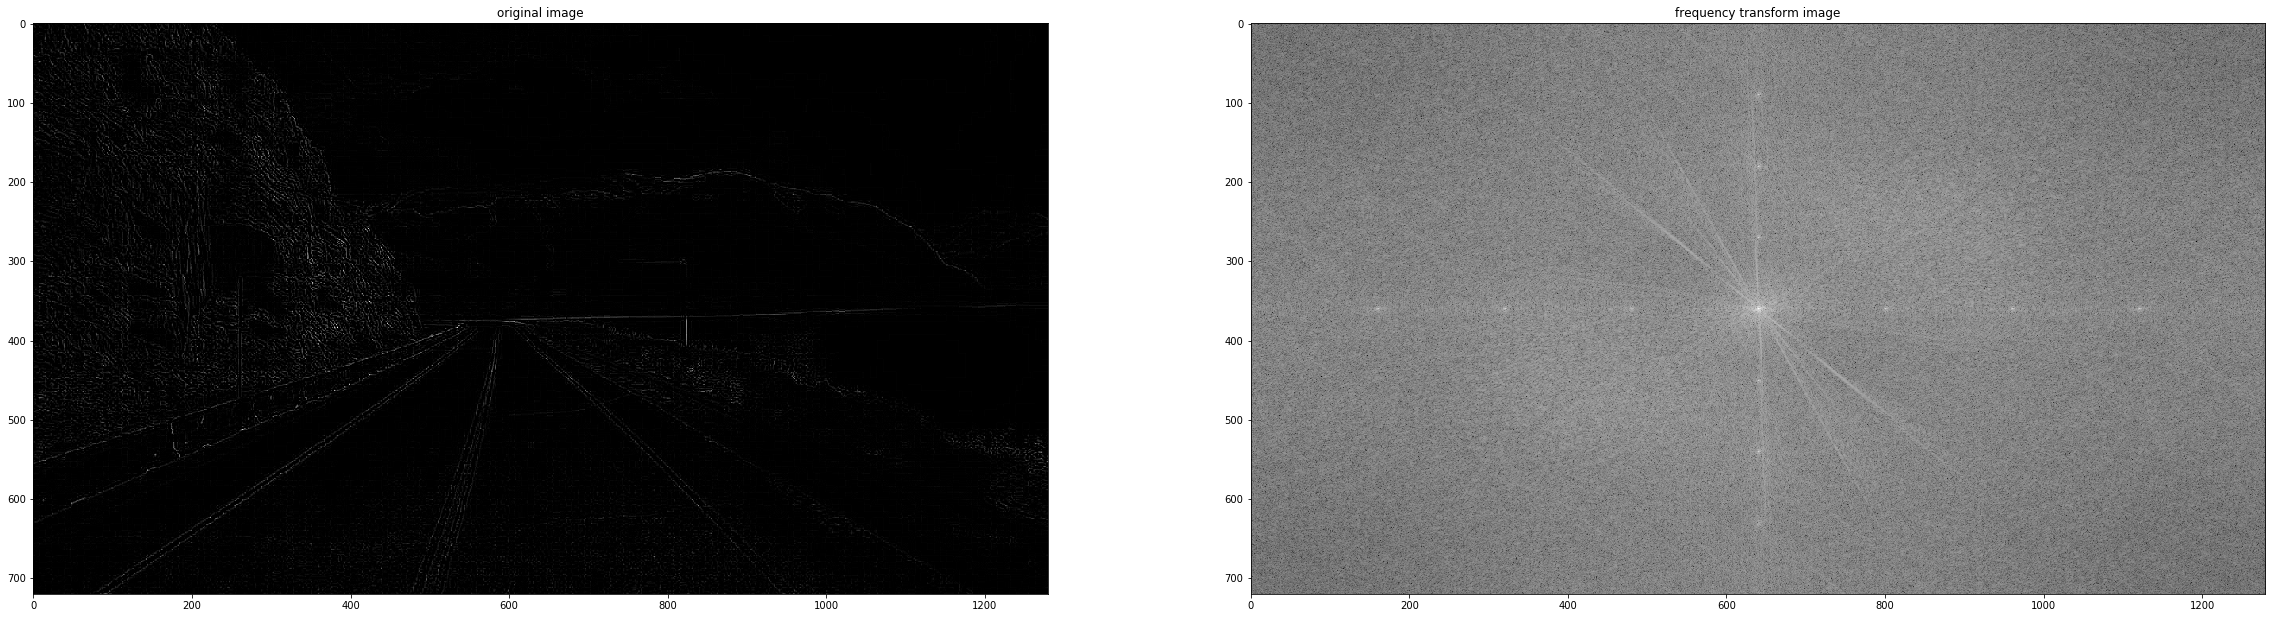

In [40]:
after_filter = cv2.filter2D(gray, -1, laplacian)
after_norm = after_filter/255.0
after_ft = ft_image(after_norm)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(40,20))

ax1.set_title('original image')
ax1.imshow(after_filter, cmap='gray')
ax2.set_title('frequency transform image')
ax2.imshow(after_ft, cmap='gray')

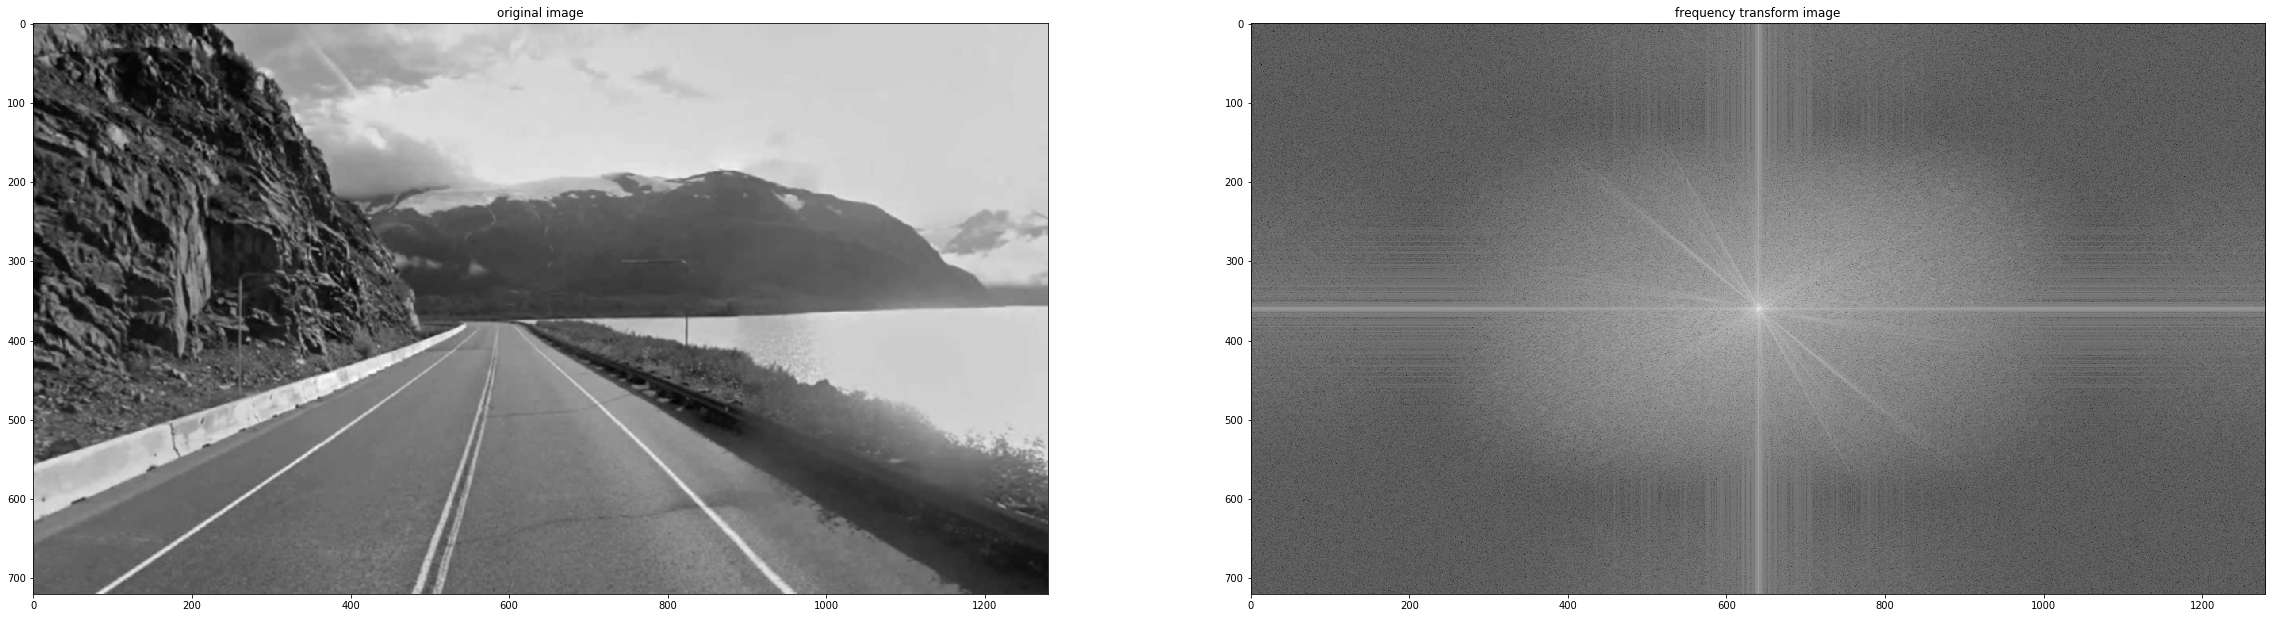

In [41]:
after_filter = cv2.filter2D(gray, -1, gaussian)
after_norm = after_filter/255.0
after_ft = ft_image(after_norm)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(40,20))

ax1.set_title('original image')
ax1.imshow(after_filter, cmap='gray')
ax2.set_title('frequency transform image')
ax2.imshow(after_ft, cmap='gray')